SOURCE
https://ram-parameswaran22.medium.com/a-relatively-faster-approach-for-reading-json-lines-file-into-pandas-dataframe-90b57353fd38

In [4]:
import pandas as pd
import json
import seaborn as sns

In [19]:
pd.read_json('AMAZON_FASHION_5.json', lines=True)  #Thanks Belisario

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Orange'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
1,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Black (3746...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
2,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Gray L...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
3,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue (37867...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
4,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Pink'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3171,5,True,"07 2, 2018",A2077NII5H62R2,B005AGO4LU,"{'Size:': ' 8.5 B(M) US', 'Color:': ' Green Gl...",Amazon Customer,Perfect fit!,Five Stars,1530489600,NaN,NaN
3172,5,True,"06 28, 2018",A2IBS6PIPAGAB5,B005AGO4LU,"{'Size:': ' 5 B(M) US', 'Color:': ' Wolf Grey/...",J. Avila,My favorite cross trainers!,Comfortable,1530144000,NaN,NaN
3173,5,True,"06 25, 2018",A1GTC5EVSJNCQ8,B005AGO4LU,"{'Size:': ' 8 B(M) US', 'Color:': ' Blue Tint/...",Amazon Customer,Love them fit perfect,Five Stars,1529884800,NaN,NaN
3174,5,True,"06 20, 2018",A311XHHLM12MUT,B005AGO4LU,"{'Size:': ' 9 B(M) US', 'Color:': ' Blue Tint/...",Peter,Favorite Nike shoe ever! The flex sole is exce...,Love them!,1529452800,NaN,NaN


In [5]:
input_file = 'AMAZON_FASHION_5.json'

In [6]:
%%bash
head -n 3 AMAZON_FASHION_5.json

{"overall": 5.0, "verified": true, "reviewTime": "09 4, 2015", "reviewerID": "ALJ66O1Y6SLHA", "asin": "B000K2PJ4K", "style": {"Size:": " Big Boys", "Color:": " Blue/Orange"}, "reviewerName": "Tonya B.", "reviewText": "Great product and price!", "summary": "Five Stars", "unixReviewTime": 1441324800}
{"overall": 5.0, "verified": true, "reviewTime": "09 4, 2015", "reviewerID": "ALJ66O1Y6SLHA", "asin": "B000K2PJ4K", "style": {"Size:": " Big Boys", "Color:": " Black (37467610) / Red/White"}, "reviewerName": "Tonya B.", "reviewText": "Great product and price!", "summary": "Five Stars", "unixReviewTime": 1441324800}
{"overall": 5.0, "verified": true, "reviewTime": "09 4, 2015", "reviewerID": "ALJ66O1Y6SLHA", "asin": "B000K2PJ4K", "style": {"Size:": " Big Boys", "Color:": " Blue/Gray Logo"}, "reviewerName": "Tonya B.", "reviewText": "Great product and price!", "summary": "Five Stars", "unixReviewTime": 1441324800}


In [7]:
with open(input_file) as f:
    lines = f.read().splitlines()


In [9]:
type(lines)

list

In [10]:
len(lines)

3176

In [7]:
lines[0]

'{"overall": 5.0, "verified": true, "reviewTime": "09 4, 2015", "reviewerID": "ALJ66O1Y6SLHA", "asin": "B000K2PJ4K", "style": {"Size:": " Big Boys", "Color:": " Blue/Orange"}, "reviewerName": "Tonya B.", "reviewText": "Great product and price!", "summary": "Five Stars", "unixReviewTime": 1441324800}'

In [11]:
df_inter = pd.DataFrame(lines)

df_inter.columns = ['json_element']
df_inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3176 entries, 0 to 3175
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   json_element  3176 non-null   object
dtypes: object(1)
memory usage: 24.9+ KB


In [14]:
df_inter.head()

,json_element
0,"{""overall"": 5.0, ""verified"": true, ""reviewTime..."
1,"{""overall"": 5.0, ""verified"": true, ""reviewTime..."
2,"{""overall"": 5.0, ""verified"": true, ""reviewTime..."
3,"{""overall"": 5.0, ""verified"": true, ""reviewTime..."
4,"{""overall"": 5.0, ""verified"": true, ""reviewTime..."


In [9]:
df_inter['json_element'].apply(json.loads)

0       {'overall': 5.0, 'verified': True, 'reviewTime...
1       {'overall': 5.0, 'verified': True, 'reviewTime...
2       {'overall': 5.0, 'verified': True, 'reviewTime...
3       {'overall': 5.0, 'verified': True, 'reviewTime...
4       {'overall': 5.0, 'verified': True, 'reviewTime...
                              ...                        
3171    {'overall': 5.0, 'verified': True, 'reviewTime...
3172    {'overall': 5.0, 'verified': True, 'reviewTime...
3173    {'overall': 5.0, 'verified': True, 'reviewTime...
3174    {'overall': 5.0, 'verified': True, 'reviewTime...
3175    {'overall': 5.0, 'verified': True, 'reviewTime...
Name: json_element, Length: 3176, dtype: object

In [15]:
df_final = pd.json_normalize(df_inter['json_element'].apply(json.loads))

df_final.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style.Size:,style.Color:,style.Size Name:,style.Style:,vote,image
0,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,Big Boys,Blue/Orange,NaN,NaN,NaN,NaN
1,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,Big Boys,Black (37467610) / Red/White,NaN,NaN,NaN,NaN
2,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,Big Boys,Blue/Gray Logo,NaN,NaN,NaN,NaN
3,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,Big Boys,Blue (37867638-99) / Yellow,NaN,NaN,NaN,NaN
4,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,Big Boys,Blue/Pink,NaN,NaN,NaN,NaN


In [11]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3176 entries, 0 to 3175
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   overall           3176 non-null   float64
 1   verified          3176 non-null   bool   
 2   reviewTime        3176 non-null   object 
 3   reviewerID        3176 non-null   object 
 4   asin              3176 non-null   object 
 5   reviewerName      3176 non-null   object 
 6   reviewText        3160 non-null   object 
 7   summary           3176 non-null   object 
 8   unixReviewTime    3176 non-null   int64  
 9   style.Size:       3102 non-null   object 
 10  style.Color:      3095 non-null   object 
 11  style.Size Name:  2 non-null      object 
 12  style.Style:      3 non-null      object 
 13  vote              297 non-null    object 
 14  image             106 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(12)
memory usage: 350.6+ KB


In [12]:
df_final.reviewText

0                                Great product and price!
1                                Great product and price!
2                                Great product and price!
3                                Great product and price!
4                                Great product and price!
                              ...                        
3171                                         Perfect fit!
3172                          My favorite cross trainers!
3173                                Love them fit perfect
3174    Favorite Nike shoe ever! The flex sole is exce...
3175         I wear these everyday to work, the gym, etc.
Name: reviewText, Length: 3176, dtype: object

/Users/seanreed1/miniconda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='overall', ylabel='count'>

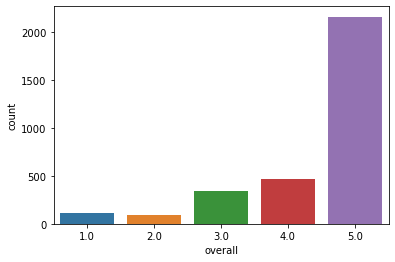

In [16]:
sns.countplot(df_final.overall)